<a href="https://colab.research.google.com/github/AnaSofia29345/Proyecto-IA/blob/main/99%20-%20modelo%20soluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#cargar datos de la competencia de kaggle
import numpy as np
!pip install opendatasets
import opendatasets as od
dataset_link = "https://www.kaggle.com/competitions/udea-ai4eng-20242"
od.download(dataset_link)
import os
os.chdir("udea-ai4eng-20242")
os.listdir()
import pandas as pd
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anasofia29
Your Kaggle Key: ··········


100%|██████████| 20.1M/20.1M [00:00<00:00, 61.5MB/s]



Extracting archive ./udea-ai4eng-20242/udea-ai4eng-20242.zip to ./udea-ai4eng-20242


In [ ]:
#cargamos el archivo de train
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


observamos el tipo de datos que tenemos




In [ ]:
#mostramos la forma del dataframe
train.shape

(692500, 12)

In [ ]:
#observamos la cantidad de daros faltantes
train.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


In [ ]:
#miramos el tipo de datos que tienen cada una de las columnas , es decir si son categóricas o númericas
for c in train.columns:
    print ("%20s"%c, train[c].dtype)

                  ID int64
             PERIODO int64
 ESTU_PRGM_ACADEMICO object
ESTU_PRGM_DEPARTAMENTO object
ESTU_VALORMATRICULAUNIVERSIDAD object
ESTU_HORASSEMANATRABAJA object
FAMI_ESTRATOVIVIENDA object
  FAMI_TIENEINTERNET object
 FAMI_EDUCACIONPADRE object
 FAMI_EDUCACIONMADRE object
ESTU_PAGOMATRICULAPROPIO object
  RENDIMIENTO_GLOBAL object


In [ ]:
#reemplazamos los datos de las columnas de las cuales no se tiene información por no info
train=train.copy() #creamos una copia de los datos
train.ESTU_VALORMATRICULAUNIVERSIDAD.values[train.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info' #le asignamos no info a los datos faltantes
train.ESTU_HORASSEMANATRABAJA.values[train.ESTU_HORASSEMANATRABAJA.isna()] = 'no info' #le asignamos no info a los datos faltantes
train.FAMI_ESTRATOVIVIENDA.values[train.FAMI_ESTRATOVIVIENDA.isna()] = 'no info' #le asignamos no info a los datos faltantes
train.FAMI_EDUCACIONPADRE.values[train.FAMI_EDUCACIONPADRE.isna()] = 'no info' #le asignamos no info a los datos faltantes
train.FAMI_EDUCACIONMADRE.values[train.FAMI_EDUCACIONMADRE.isna()] = 'no info' #le asignamos no info a los datos faltantes
train.FAMI_TIENEINTERNET.values[train.FAMI_TIENEINTERNET.isna()] = 'no info' #le asignamos no info a los datos faltantes
train.ESTU_PAGOMATRICULAPROPIO.values[train.ESTU_PAGOMATRICULAPROPIO.isna()] = 'no info' #le asignamos no info a los datos faltantes


In [ ]:
#eliminamos la columna del ID
train.drop('ID', axis=1, inplace=True)

In [ ]:
#le aplicamos un one-hot encoding a la columna periodo
#vamos aplicarle un one-hot encoding a la columna periodo
train=train.copy() #creamos una copia de los datos
#definimos la columna a la que le vamos a aplicar el one-hot encoding
PERIODO = train['PERIODO']
train = pd.get_dummies(train, columns=['PERIODO'])
train["PERIODO_20195"]=train["PERIODO_20195"].astype(int)

train["PERIODO_20202"]=train["PERIODO_20202"].astype(int)
train["PERIODO_20203"]=train["PERIODO_20203"].astype(int)
train["PERIODO_20212"]=train["PERIODO_20212"].astype(int)
train["PERIODO_20213"]=train["PERIODO_20213"].astype(int)
train["PERIODO_20183"]=train["PERIODO_20183"].astype(int)
train["PERIODO_20184"]=train["PERIODO_20184"].astype(int)




train["PERIODO_20194"]=train["PERIODO_20194"].astype(int)
train["PERIODO_20195"]=train["PERIODO_20195"].astype(int)
train["PERIODO_20196"]=train["PERIODO_20196"].astype(int)



In [ ]:
train.shape #mostramos la nueva forma del dataset despúes de aplicarle el one-hot encoding a la columna periodo

(692500, 19)

In [ ]:
#seguimos con la columna del programa academico
train.ESTU_PRGM_ACADEMICO.isna()#miramos si hay valores nulos en la columna
train.ESTU_PRGM_ACADEMICO.value_counts() #mostramos los valores de esta columna

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA,1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES,1
ADMINISTRACION DE COMERCIO EXTERIOR,1


In [ ]:
#le vamos a aplicar un one-hot encoding a la columna de programa academico
ESTU_PRGM_ACADEMICO_vals=train.ESTU_PRGM_ACADEMICO.sort_values().unique()
ESTU_PRGM_ACADEMICO_vals
np.eye(len(ESTU_PRGM_ACADEMICO_vals))[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
#agrupamos el programa academico en areas del conocimiento
train["ingenieria"] = [1 if i == "Ingeniería" else 0 for i in train.ESTU_PRGM_ACADEMICO]

train["licenciatura"] = [1 if i == "Licenciatura" else 0 for i in train.ESTU_PRGM_ACADEMICO]

train["educacion_basica"] = [1 if i == "Educación básica" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train["educacion_basica"].value_counts()
train["medicina"] = [1 if i == "Medicina" else 0 for i in train.ESTU_PRGM_ACADEMICO]

train["DERECHO"] = [1 if i == "DERECHO" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train["DERECHO"].value_counts()
train["zootecnia"] = [1 if i == "Zootecnia" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train["zootecnia"].value_counts()
train["administracion"] = [1 if i == "Administración" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train["administracion"].value_counts()
train["arquitectura"] = [1 if i == "Arquitectura" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train["arquitectura"].value_counts()
train["biologia"] = [1 if i == "Biología" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train["biologia"].value_counts()
train["ciencias"] = [1 if i == "Ciencias" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train["ciencias"].value_counts()
train["comunicacion"] = [1 if i == "Comunicación" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train["comunicacion"].value_counts()
train["contabilidad"] = [1 if i == "Contabilidad" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train["contabilidad"].value_counts()
train['Economia']=[1 if i == "Economía" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['Economia'].value_counts()
train['Enfermeria']=[1 if i == "Enfermería" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['Enfermeria'].value_counts()
train['Estadistica']=[1 if i == "Estadística" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['Estadistica'].value_counts()
train['Fisica']=[1 if i == "Física" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['Fisica'].value_counts()
train['Geologia']=[1 if i == "Geología" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['Geologia'].value_counts()
train['Gestion']=[1 if i == "Gestión" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['Gestion'].value_counts()
train['Historia']=[1 if i == "Historia" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['Historia'].value_counts()
train['Idiomas']=[1 if i == "Idiomas" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['Idiomas'].value_counts()
train['TRABAJO SOCIAL']=[1 if i == "TRABAJO SOCIAL" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['TRABAJO SOCIAL'].value_counts()
train['PSICOLOGÍA']=[1 if i == "PSICOLOGÍA" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['PSICOLOGÍA'].value_counts()
train['QUIMICA']=[1 if i == "Química" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['QUIMICA'].value_counts()
train['MEDICINA VETERINARIA Y ZOOTECNIA']=[1 if i == "Medicina veterinaria y zootecnia" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['MEDICINA VETERINARIA Y ZOOTECNIA'].value_counts()
train['CIENCIA POLITICAS']=[1 if i == "Ciencia Políticas" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['CIENCIA POLITICAS'].value_counts()
train['ODONTOLOGÍA']=[1 if i == "Odontología" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['ODONTOLOGÍA'].value_counts()
train['FINANZAS Y RELACIONES INTERNACIONALES']=[1 if i == "Finanzas y Relaciones internacionales" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['FINANZAS Y RELACIONES INTERNACIONALES'].value_counts()
train['NEGOCIOS INTERNACIONALES']=[1 if i == "Negocios internacionales" else 0 for i in train.ESTU_PRGM_ACADEMICO]
train['NEGOCIOS INTERNACIONALES'].value_counts()
train['otras']=1



In [ ]:

#eliminamos la columna del nombre del programa academico
train = train.drop('ESTU_PRGM_ACADEMICO', axis=1)
train.shape

(692500, 45)

In [ ]:
#seguimos con la columna del programa por departamento
train.ESTU_PRGM_DEPARTAMENTO.isna()#miramos si hay valores nulos en la columna
train.ESTU_PRGM_DEPARTAMENTO.value_counts() #mostramos los valores de esta columna

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


In [ ]:
#le vamos aplicar un one-hot encoding a la columna
#vamos a aplicarle un one-hot encoding a la columna de programa por departamento
train=train.copy() #creamos una copia de los datos
#le vamos aplicar un one-hot encoding a esta columna

x = train.ESTU_PRGM_DEPARTAMENTO.values
ESTU_PRGM_DEPARTAMENTO_vals = sorted(np.unique(x))
ESTU_PRGM_DEPARTAMENTO_onehot_vals = {val: np.eye(len(ESTU_PRGM_DEPARTAMENTO_vals))[i] for i,val in enumerate(ESTU_PRGM_DEPARTAMENTO_vals)}
ESTU_PRGM_DEPARTAMENTO_onehot_vals


{'AMAZONAS': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ANTIOQUIA': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ARAUCA': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ATLANTICO': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOGOTÁ': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOLIVAR': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOYACA': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
#concatenamos los valores de la columna de programa por departamento
ESTU_PRGM_DEPARTAMENTO_onehot_enc = np.r_[[ESTU_PRGM_DEPARTAMENTO_onehot_vals[i] for i in train.ESTU_PRGM_DEPARTAMENTO]]
ESTU_PRGM_DEPARTAMENTO_onehot_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
#mostramos la columna del programa por departamento despues de aplicarle el one-hot encoding
ESTU_PRGM_DEPARTAMENTO_df = pd.DataFrame(ESTU_PRGM_DEPARTAMENTO_onehot_enc, columns=[f"ESTU_PRGM_DEPARTAMENTO__{v}" for v in ESTU_PRGM_DEPARTAMENTO_onehot_vals])
ESTU_PRGM_DEPARTAMENTO_df

,ESTU_PRGM_DEPARTAMENTO__AMAZONAS,ESTU_PRGM_DEPARTAMENTO__ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO__ARAUCA,ESTU_PRGM_DEPARTAMENTO__ATLANTICO,ESTU_PRGM_DEPARTAMENTO__BOGOTÁ,ESTU_PRGM_DEPARTAMENTO__BOLIVAR,ESTU_PRGM_DEPARTAMENTO__BOYACA,ESTU_PRGM_DEPARTAMENTO__CALDAS,ESTU_PRGM_DEPARTAMENTO__CAQUETA,ESTU_PRGM_DEPARTAMENTO__CASANARE,...,ESTU_PRGM_DEPARTAMENTO__NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO__PUTUMAYO,ESTU_PRGM_DEPARTAMENTO__QUINDIO,ESTU_PRGM_DEPARTAMENTO__RISARALDA,ESTU_PRGM_DEPARTAMENTO__SAN ANDRES,ESTU_PRGM_DEPARTAMENTO__SANTANDER,ESTU_PRGM_DEPARTAMENTO__SUCRE,ESTU_PRGM_DEPARTAMENTO__TOLIMA,ESTU_PRGM_DEPARTAMENTO__VALLE,ESTU_PRGM_DEPARTAMENTO__VAUPES
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#concatenamos la columna del programa por departamento
train = pd.concat([train, ESTU_PRGM_DEPARTAMENTO_df], axis=1)
train.shape

(692500, 76)

In [ ]:
#eliminamos la columna de programa por departamento
train = train.drop('ESTU_PRGM_DEPARTAMENTO', axis=1)
train.shape

(692500, 75)

In [ ]:
#seguimos con la columna del valor de la matricula de la universidad
train.ESTU_VALORMATRICULAUNIVERSIDAD.isna()#miramos si hay valores nulos en la columna
train.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts() #mostramos los valores de esta columna

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,204048
Entre 2.5 millones y menos de 4 millones,127430
Menos de 500 mil,80263
Entre 500 mil y menos de 1 millón,78704
Entre 4 millones y menos de 5.5 millones,69736
Más de 7 millones,68014
Entre 5.5 millones y menos de 7 millones,38490
No pagó matrícula,19528
no info,6287


In [ ]:
#vamos a convertir los valores de esta columna a forma numerica y reemplazamos los valores de cmap y usamos -1 para los valores de los cuales no se tiene información
train=train.copy() #creamos una copia de los datos
cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}
train.ESTU_VALORMATRICULAUNIVERSIDAD=train.ESTU_VALORMATRICULAUNIVERSIDAD.map(cmap)
train.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


In [ ]:
#seguimos con la columna de las horas a la semana que trabaja cada estudiante
train.ESTU_HORASSEMANATRABAJA.isna()#miramos si hay valores nulos en la columna
train.ESTU_HORASSEMANATRABAJA.value_counts() #mostramos los valores de esta columna

,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,249352
0,116550
Entre 11 y 20 horas,115857
Entre 21 y 30 horas,92693
Menos de 10 horas,87191
no info,30857


In [ ]:
train=train.copy() #creamos una copia de los datos
train.ESTU_HORASSEMANATRABAJA = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in train.ESTU_HORASSEMANATRABAJA.values] #unificamos los valores de no sabe y no aplica

In [ ]:
train['ESTU_HORASSEMANATRABAJA'].unique()

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', 'no info'], dtype=object)

In [ ]:
#vamos a reemplazar los datos faltantes por -1
train.ESTU_HORASSEMANATRABAJA.values[train.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
#le vamos aplicar un cmap a la columna
train=train.copy() #creamos una copia de los datos
cmap={"Más de 30 horas":3.0,
      "0":0,
      "Entre 11 y 20 horas":4.0,
      "Entre 21 y 30 horas":5.0,
      "Menos de 10 horas":2.0,
      "no info":-1}

train.ESTU_HORASSEMANATRABAJA = np.r_[[cmap[i] for i in train.ESTU_HORASSEMANATRABAJA]]
train.ESTU_HORASSEMANATRABAJA.value_counts()

,count
ESTU_HORASSEMANATRABAJA,
3.0,249352
0.0,116550
4.0,115857
5.0,92693
2.0,87191
-1.0,30857


In [ ]:
#le aplicamos el mismo proceso a la columna de famiestratovivienda
#le asignamos no info a los datos faltantes
train.FAMI_ESTRATOVIVIENDA.values[train.FAMI_ESTRATOVIVIENDA.isna()] = 'no info' #le asignamos no info a los datos faltantes
train.FAMI_ESTRATOVIVIENDA.value_counts() #mostramos los valores de esta columna
train=train.copy() #creamos una copia de los datos
cmap={"Estrato 1":1,
      "Estrato 2":2,
      "Estrato 3":3,
      "Estrato 4":4,
      "Estrato 5":5,
      "Estrato 6":6,
      "Sin Estrato":0,
      "no info":-1}

train.FAMI_ESTRATOVIVIENDA = np.r_[[cmap[i] for i in train.FAMI_ESTRATOVIVIENDA]]
train.FAMI_ESTRATOVIVIENDA.value_counts()


,count
FAMI_ESTRATOVIVIENDA,
2,232671
3,210685
1,111991
4,65514
-1,32137
5,23608
6,12605
0,3289


In [ ]:
#continuamos con la columna de fami tiene internet
train.FAMI_TIENEINTERNET.isna()#miramos si hay valores nulos en la columna
train.FAMI_TIENEINTERNET.value_counts() #mostramos los valores de esta columna

,count
FAMI_TIENEINTERNET,
Si,592514
No,73357
no info,26629


In [ ]:
#asignamos 1 para los que si tienen internet y 0 para los que no y -1 para los cuales no tenemos información
cmap={"Si":1,
      "No":0,
      "no info":-1}
train.FAMI_TIENEINTERNET = train.FAMI_TIENEINTERNET.map(cmap)
train.FAMI_TIENEINTERNET.value_counts()

,count
FAMI_TIENEINTERNET,
1,592514
0,73357
-1,26629


In [ ]:
#continuamos con la columna de la educación del padre
train.FAMI_EDUCACIONPADRE.isna()#miramos si hay valores nulos en la columna
train.FAMI_EDUCACIONPADRE.value_counts() #mostramos los valores de esta columna

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
Postgrado,44169
Educación profesional incompleta,27084
no info,23178


In [ ]:
#vamos a unificar los valores de no sabe y no aplica
train=train.copy() #creamos una copia de los datos
train.FAMI_EDUCACIONPADRE= ['no info' if i in ['No sabe', 'No Aplica'] else i for i in train. FAMI_EDUCACIONPADRE.values] #unificamos los valores de no sabe y no aplica

In [ ]:
#vamos aplicarle un one-hot encoding a esta columna
train=train.copy() #creamos una copia de los datos
#Primero se crea un one-hot mapping
x = train.FAMI_EDUCACIONPADRE.values
FAMI_EDUCACIONPADRE_vals = sorted(np.unique(x))
FAMI_EDUCACIONPADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONPADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONPADRE_vals)}
FAMI_EDUCACIONPADRE_onehot_vals

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
#aplicamos el one-hot encoding
FAMI_EDUCACIONPADRE_onehot_enc = np.r_[[FAMI_EDUCACIONPADRE_onehot_vals[i] for i in train.FAMI_EDUCACIONPADRE]]
FAMI_EDUCACIONPADRE_onehot_enc

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONPADRE_onehot_enc, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in FAMI_EDUCACIONPADRE_onehot_vals])
FAMI_EDUCACIONPADRE_df

,FAMI_EDUCACIONPADRE__Educación profesional completa,FAMI_EDUCACIONPADRE__Educación profesional incompleta,FAMI_EDUCACIONPADRE__Ninguno,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#concatenamos la columna de la educacion del padre
train = pd.concat([train, FAMI_EDUCACIONPADRE_df], axis=1).drop('FAMI_EDUCACIONPADRE', axis=1)
train.shape

(692500, 85)

In [ ]:
#seguimos con la columna de la educacion de la madre y a esta le vamos aplicar un mapeo
train=train.copy() #creamos una copia de los datos


In [ ]:
sum(train.FAMI_EDUCACIONMADRE.isna()) #miramos si hay datos faltantes en la columna

0

In [ ]:
#asignamos no info a los datos faltantes
train=train.copy() #creamos una copia de los datos
train.FAMI_EDUCACIONMADRE.values[train.FAMI_EDUCACIONMADRE.isna()] = 'no info'
sum(train.FAMI_EDUCACIONMADRE.isna())

0

In [ ]:
#unificamos los valores de no sabe y no aplica
train = train.copy()
train.FAMI_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in train.FAMI_EDUCACIONMADRE.values]

In [ ]:
#mostramos los valores de la columna
train.FAMI_EDUCACIONMADRE.value_counts()

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
no info,28599
Técnica o tecnológica incompleta,27533


In [ ]:
#le aplicamos un mapeo a esta columna
train=train.copy() #creamos una copia de los datos
FAMI_EDUCACIONMADRE_vals=train.FAMI_EDUCACIONMADRE.sort_values().unique()

cmap = {val: i for i,val in enumerate(FAMI_EDUCACIONMADRE_vals)}
train.FAMI_EDUCACIONMADRE = [cmap[i] for i in train.FAMI_EDUCACIONMADRE]
train.FAMI_EDUCACIONMADRE.value_counts()




,count
FAMI_EDUCACIONMADRE,
6,141744
5,99420
8,89542
0,85326
7,81012
4,56125
3,46246
10,28599
9,27533


In [ ]:
#seguimos con la columna de pago de matricula propio
train.ESTU_PAGOMATRICULAPROPIO.isna()#miramos si hay valores nulos en la columna
train.ESTU_PAGOMATRICULAPROPIO.value_counts() #mostramos los valores de esta columna

,count
ESTU_PAGOMATRICULAPROPIO,
No,382201
Si,303801
no info,6498


In [ ]:
#le aplicamos un one-hot encoding a esta columna
train=train.copy() #creamos una copia de los datos
one_hot_vals = {'Si': 1, 'No': 0, 'no info': -1}
train.ESTU_PAGOMATRICULAPROPIO = train.ESTU_PAGOMATRICULAPROPIO.map(one_hot_vals)
train.ESTU_PAGOMATRICULAPROPIO.value_counts()

,count
ESTU_PAGOMATRICULAPROPIO,
0,382201
1,303801
-1,6498


In [ ]:
train.RENDIMIENTO_GLOBAL.unique()

array(['medio-alto', 'bajo', 'alto', 'medio-bajo'], dtype=object)

In [ ]:
#finalmente, para lograr que todo el dataset sea númerico vamos a asignar valores númericos a la columna de rendimiento global
train=train.copy() #creamos una copia de los datos
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
train[y_col] = [rmap[i] for i in train[y_col]]
train. RENDIMIENTO_GLOBAL.value_counts()

,count
RENDIMIENTO_GLOBAL,
3,175619
0,172987
1,172275
2,171619


In [ ]:
train.head() #mostramos el dataset en forma númerica

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PERIODO_20183,PERIODO_20184,PERIODO_20194,...,FAMI_EDUCACIONPADRE__Educación profesional incompleta,FAMI_EDUCACIONPADRE__Ninguno,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info
0,6.25,2.0,3,1,3,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.25,0.0,3,0,9,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.25,3.0,3,1,6,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.75,0.0,4,1,6,0,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.25,5.0,3,1,4,0,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.describe() #mostramos estadisticas  del dataset

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PERIODO_20183,PERIODO_20184,PERIODO_20194,...,FAMI_EDUCACIONPADRE__Educación profesional incompleta,FAMI_EDUCACIONPADRE__Ninguno,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,...,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,2.805712,2.625955,2.358090,0.817162,5.168874,0.429318,1.505227,0.238004,0.000367,0.002126,...,0.039110,0.031781,0.063782,0.080806,0.181480,0.185255,0.103471,0.090968,0.032566,0.070757
std,2.323047,1.707743,1.323204,0.475726,2.759050,0.513587,1.121061,0.425862,0.019148,0.046056,...,0.193858,0.175415,0.244364,0.272537,0.385416,0.388504,0.304574,0.287563,0.177498,0.256418
min,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,2.000000,2.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.750000,3.000000,2.000000,1.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.750000,4.000000,3.000000,1.000000,7.000000,1.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.750000,5.000000,6.000000,1.000000,10.000000,1.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Luego, como ya tenemos el dataset en forma númerica, vamos a escoger un modelo y lo vamos a entrenar para que prediga el rendimiento global de los estudiantes

In [ ]:
#separamos la variable que queremos predecir, en este caso seria el rendimiento global
train = train[sorted(train.columns)]    #aseguramos que las columnas tengan el mismo orden

X = train[[c for c in train.columns if c!=y_col]].values
y = train[y_col].values
X.shape, y.shape

((692500, 84), (692500,))

In [ ]:
#Importamos las librerias de sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics  import  median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline


In [ ]:
#dividimos los datos de train y test
Xtr, Xts,ytr, yts=train_test_split(X,y, test_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape
# #xtr y ytr son los datos que se usan para entrenar y xts y yts para medir la metrica

((138500, 84), (554000, 84), (138500,), (554000,))

In [ ]:
#escogemos un modelo linear para la clasificación
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(Xtr, ytr) #calibramos el modelo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#generamos las respectivas predicciones
preds_tr = model.predict(Xtr)
preds_ts = model.predict(Xts)

In [ ]:
model.score(Xtr, ytr) #calculamos el score del modelo

0.37516967509025273

In [ ]:
r2_score(yts, model.predict(Xts)) #calculamos el r2 score

-0.49121925418790924

In [ ]:
median_absolute_error(yts, model.predict(Xts)) #calculamos el error medio absoluto de este modelo


1.0

In [ ]:
mean_squared_error(yts, model.predict(Xts)) #calculamos el error cuadrático en la predicción

1.8745613718411553

In [ ]:
#mostramos las 10 primeras predicciones
print(preds_tr[:10])
print(preds_ts[:10])

[1 3 2 3 0 2 0 0 0 3]
[0 1 0 3 3 0 0 0 3 0]


In [ ]:
#calculamos el porcentaje de acierto y la matriz de confusion
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)


(0.37516967509025273, 0.37545848375451263)

In [ ]:
#hacemos la matriz de confusion para evaluar el rendimiento del modelo
cm_tr = confusion_matrix(ytr, preds_tr) #matriz de confusion para train
cm_ts = confusion_matrix(yts, preds_ts) #matriz de confusion para test

# normalize by class
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

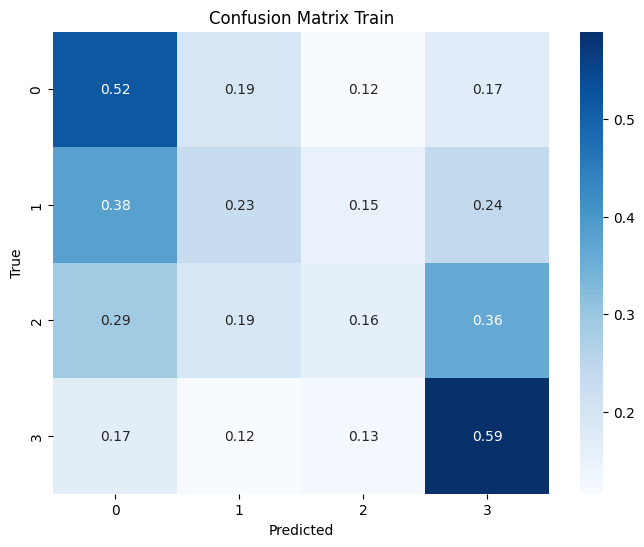

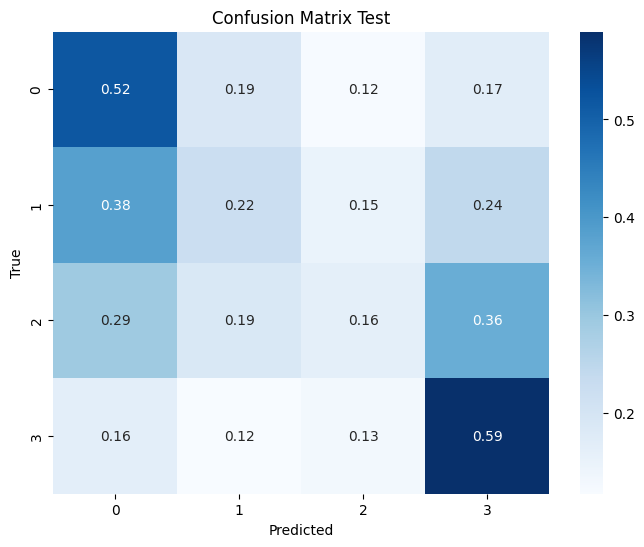

In [ ]:
#graficamos la matriz de confusion de train y test
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
#graficamos la matriz de confusion de train
sns.heatmap(cm_tr, annot=True, fmt='.2f', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Train')
plt.show()
#Ahora, vamos a graficar la matriz de confusion de test
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ts, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Test')
plt.show()





In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
lr_small = LogisticRegression()   #hacemos un pequeño modelo de regresion logistica y lo entrenamos
lr_small.fit(Xtr, ytr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
preds_tr = lr_small.predict(Xtr)
preds_ts = lr_small.predict(Xts)
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(0.3757238267148014, 0.37787003610108305)

Text(0.5, 1.0, 'Confusion Matrix Test')

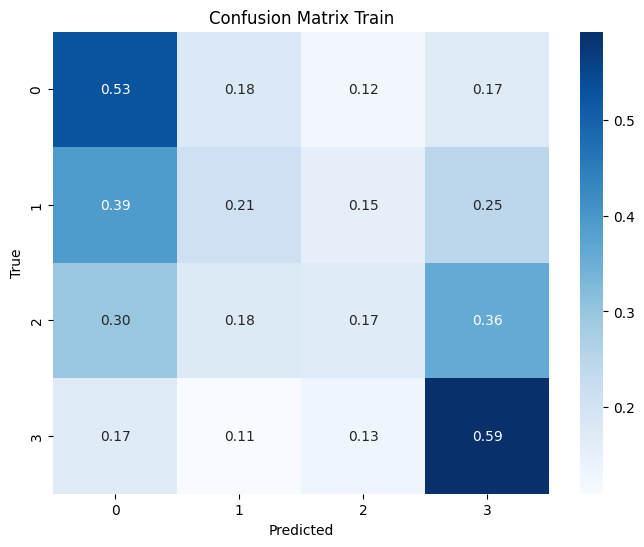

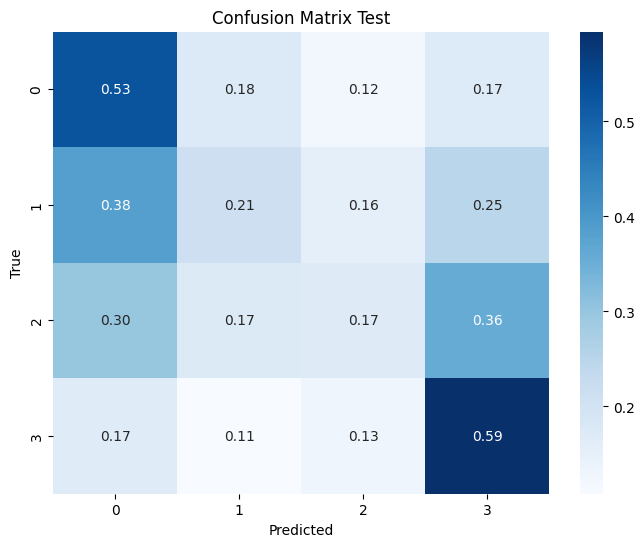

In [ ]:
#generamos la matriz de confusion
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# normalize by class
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

import seaborn as sns
#graficamos la matriz de confusion para train
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tr, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Train')
plt.show
#graficamos la matriz de confusion para test
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ts, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Test')

In [ ]:
#le vamos a aplicar el preprocesado a los datos de test
#En este caso, no se cuenta con la columna de rendimiento global,ya que esta es la que se quiere predecir
zt = pd.read_csv("test.csv") #cargamos los datos de test
zt

,Unnamed: 0,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No
...,...,...,...,...,...,...,...,...,...,...,...,...
296781,296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Primaria incompleta,Si
296782,296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Educación profesional completa,No
296783,296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Educación profesional completa,No
296784,296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Educación profesional completa,No


In [ ]:
#En este caso no se va a eliminar la columna ID, ya que esta es necesaria para cuando se haga el envio del modelo a Kaggle
zt_ids = zt['ID'].values
zt = zt[['FAMI_EDUCACIONMADRE', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO','PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO','FAMI_EDUCACIONPADRE']]
print ("shape of loaded dataframe", zt.shape)
zt.head()

shape of loaded dataframe (296786, 10)


,FAMI_EDUCACIONMADRE,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_EDUCACIONPADRE
0,Primaria completa,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Si,20183,TRABAJO SOCIAL,BOLIVAR,Técnica o tecnológica completa
1,Técnica o tecnológica completa,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,No,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Secundaria (Bachillerato) completa
2,Secundaria (Bachillerato) completa,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,No,20212,INGENIERIA MECATRONICA,BOGOTÁ,Secundaria (Bachillerato) incompleta
3,Primaria incompleta,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,No,20195,CONTADURIA PUBLICA,SUCRE,Primaria incompleta
4,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,No,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Secundaria (Bachillerato) completa


In [ ]:
#observamos los datos faltantes que hay en cada una de las columnas
zt.isnull().sum()

,0
FAMI_EDUCACIONMADRE,10223
ESTU_VALORMATRICULAUNIVERSIDAD,2723
ESTU_HORASSEMANATRABAJA,13379
FAMI_ESTRATOVIVIENDA,13795
FAMI_TIENEINTERNET,11539
ESTU_PAGOMATRICULAPROPIO,2807
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
FAMI_EDUCACIONPADRE,9993


In [ ]:
#asignamos no info a los datos faltantes de las columna
zt=zt.copy() #creamos una copia de los datos
zt.ESTU_VALORMATRICULAUNIVERSIDAD.values[zt.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info' #le asignamos no info a los datos faltantes
zt.ESTU_HORASSEMANATRABAJA.values[zt.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
zt.FAMI_ESTRATOVIVIENDA.values[zt.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
zt.FAMI_EDUCACIONPADRE.values[zt.FAMI_EDUCACIONPADRE.isna()] = 'no info'
zt.FAMI_EDUCACIONMADRE.values[zt.FAMI_EDUCACIONMADRE.isna()] = 'no info'
zt.FAMI_TIENEINTERNET.values[zt.FAMI_TIENEINTERNET.isna()] = 'no info'
zt.ESTU_PAGOMATRICULAPROPIO.values[zt.ESTU_PAGOMATRICULAPROPIO.isna()] = 'no info'

In [ ]:
#le aplicamos un one-hot encoding a la columna Periodo
zt=zt.copy() #creamos una copia de los datos
#Primero se crea un one-hot mapping
x = zt.PERIODO.values
PERIODO_vals = sorted(np.unique(x))
PERIODO_onehot_vals = {val: np.eye(len(PERIODO_vals))[i] for i,val in enumerate(PERIODO_vals)}
PERIODO_onehot_vals

{20183: array([1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 20184: array([0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 20194: array([0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 20195: array([0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 20196: array([0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 20202: array([0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 20203: array([0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 20212: array([0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 20213: array([0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
PERIODO_onehot_enc = np.r_[[PERIODO_onehot_vals[i] for i in zt.PERIODO]]
PERIODO_onehot_enc

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
PERIODO_df = pd.DataFrame(PERIODO_onehot_enc, columns=[f"PERIODO__{v}" for v in PERIODO_onehot_vals])
PERIODO_df

,PERIODO__20183,PERIODO__20184,PERIODO__20194,PERIODO__20195,PERIODO__20196,PERIODO__20202,PERIODO__20203,PERIODO__20212,PERIODO__20213
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
296781,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
296782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
296784,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#concatenamos la columna del periodo
zt = pd.concat([zt, PERIODO_df], axis=1).drop('PERIODO', axis=1)
zt.shape

(296786, 18)

In [ ]:
##seguimos con la columna del programa academico
zt.ESTU_PRGM_ACADEMICO.isna()#miramos si hay valores nulos en la columna
zt.ESTU_PRGM_ACADEMICO.value_counts() #mostramos los valores de esta columna

,count
ESTU_PRGM_ACADEMICO,
DERECHO,22984
ADMINISTRACION DE EMPRESAS,22298
CONTADURIA PUBLICA,16861
PSICOLOGIA,13818
INGENIERIA INDUSTRIAL,12516
...,...
DISEÑO Y GESTIÓN DEL PRODUCTO,1
LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN IDIOMAS EXTRANJEROS,1
ADMINISTRACION TECNOLOGICA,1


In [ ]:
#le vamos a aplicar un one-hot encoding a la columna de programa academico
ESTU_PRGM_ACADEMICO_vals=zt.ESTU_PRGM_ACADEMICO.sort_values().unique()
ESTU_PRGM_ACADEMICO_vals
np.eye(len(ESTU_PRGM_ACADEMICO_vals))[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
#agrupamos el programa academico en areas del conocimiento
zt["ingenieria"] = [1 if i == "Ingeniería" else 0 for i in zt.ESTU_PRGM_ACADEMICO]

zt["licenciatura"] = [1 if i == "Licenciatura" else 0 for i in zt.ESTU_PRGM_ACADEMICO]

zt["educacion_basica"] = [1 if i == "Educación básica" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["educacion_basica"].value_counts()
zt["medicina"] = [1 if i == "Medicina" else 0 for i in zt.ESTU_PRGM_ACADEMICO]

zt["derecho"] = [1 if i == "Derecho" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["derecho"].value_counts()
zt["zootecnia"] = [1 if i == "Zootecnia" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["zootecnia"].value_counts()
zt["administracion"] = [1 if i == "Administración" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["administracion"].value_counts()
zt["arquitectura"] = [1 if i == "Arquitectura" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["arquitectura"].value_counts()
zt["biologia"] = [1 if i == "Biología" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["biologia"].value_counts()
zt["ciencias"] = [1 if i == "Ciencias" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["ciencias"].value_counts()
zt["comunicacion"] = [1 if i == "Comunicación" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["comunicacion"].value_counts()
zt["contabilidad"] = [1 if i == "Contabilidad" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["contabilidad"].value_counts()
zt['Economia']=[1 if i == "Economía" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Economia'].value_counts()
zt['Enfermeria']=[1 if i == "Enfermería" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Enfermeria'].value_counts()
zt['Estadistica']=[1 if i == "Estadística" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Estadistica'].value_counts()
zt['Fisica']=[1 if i == "Física" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Fisica'].value_counts()
zt['Geologia']=[1 if i == "Geología" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Geologia'].value_counts()
zt['Gestion']=[1 if i == "Gestión" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Gestion'].value_counts()
zt['Historia']=[1 if i == "Historia" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Historia'].value_counts()
zt['Idiomas']=[1 if i == "Idiomas" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Idiomas'].value_counts()
zt['TRABAJO SOCIAL']=[1 if i == "TRABAJO SOCIAL" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['TRABAJO SOCIAL'].value_counts()
zt['PSICOLOGÍA']=[1 if i == "PSICOLOGÍA" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['PSICOLOGÍA'].value_counts()
zt['QUIMICA']=[1 if i == "Química" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['QUIMICA'].value_counts()
zt['CIENCIA POLITICAS']=[1 if i == "Ciencia Políticas" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['CIENCIA POLITICAS'].value_counts()

zt['MEDICINA VETERINARIA Y ZOOTECNIA']=[1 if i == "Medicina veterinaria y zootecnia" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['MEDICINA VETERINARIA Y ZOOTECNIA'].value_counts()
zt['ENFERMERIA']=[1 if i == "Enfermería" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['ENFERMERIA'].value_counts()
zt['ODONTOLOGÍA']=[1 if i == "Odontología" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['ODONTOLOGÍA'].value_counts()
zt['FINANZAS Y RELACIONES INTERNACIONALES']=[1 if i == "Finanzas y Relaciones internacionales" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['FINANZAS Y RELACIONES INTERNACIONALES'].value_counts()
zt['NEGOCIOS INTERNACIONALES']=[1 if i == "Negocios internacionales" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['NEGOCIOS INTERNACIONALES'].value_counts()
zt['otras']=1

In [ ]:
#eliminamos la columna del nombre del programa academico
zt= zt.drop('ESTU_PRGM_ACADEMICO', axis=1)
zt.shape

(296786, 44)

In [ ]:
#seguimos con la columna del programa por departamento
zt.ESTU_PRGM_DEPARTAMENTO.isna()#miramos si hay valores nulos en la columna
zt.ESTU_PRGM_DEPARTAMENTO.value_counts() #mostramos los valores de esta columna

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,120714
ANTIOQUIA,35900
VALLE,19183
ATLANTICO,17696
SANTANDER,12198
NORTE SANTANDER,9606
BOLIVAR,8779
CUNDINAMARCA,6017
BOYACA,6017


In [ ]:
#le vamos aplicar un one-hot encoding a la columna
#vamos a aplicarle un one-hot encoding a la columna de programa por departamento
zt=zt.copy() #creamos una copia de los datos
#le vamos aplicar un one-hot encoding a esta columna

x = zt.ESTU_PRGM_DEPARTAMENTO.values
ESTU_PRGM_DEPARTAMENTO_vals = sorted(np.unique(x))
ESTU_PRGM_DEPARTAMENTO_onehot_vals = {val: np.eye(len(ESTU_PRGM_DEPARTAMENTO_vals))[i] for i,val in enumerate(ESTU_PRGM_DEPARTAMENTO_vals)}
ESTU_PRGM_DEPARTAMENTO_onehot_vals

{'AMAZONAS': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ANTIOQUIA': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ARAUCA': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ATLANTICO': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOGOTÁ': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOLIVAR': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOYACA': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
#concatenamos los valores de la columna de programa por departamento
ESTU_PRGM_DEPARTAMENTO_onehot_enc = np.r_[[ESTU_PRGM_DEPARTAMENTO_onehot_vals[i] for i in zt.ESTU_PRGM_DEPARTAMENTO]]
ESTU_PRGM_DEPARTAMENTO_onehot_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#mostramos la columna del programa por departamento despues de aplicarle el one-hot encoding
ESTU_PRGM_DEPARTAMENTO_df = pd.DataFrame(ESTU_PRGM_DEPARTAMENTO_onehot_enc, columns=[f"ESTU_PRGM_DEPARTAMENTO__{v}" for v in ESTU_PRGM_DEPARTAMENTO_onehot_vals])
ESTU_PRGM_DEPARTAMENTO_df

,ESTU_PRGM_DEPARTAMENTO__AMAZONAS,ESTU_PRGM_DEPARTAMENTO__ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO__ARAUCA,ESTU_PRGM_DEPARTAMENTO__ATLANTICO,ESTU_PRGM_DEPARTAMENTO__BOGOTÁ,ESTU_PRGM_DEPARTAMENTO__BOLIVAR,ESTU_PRGM_DEPARTAMENTO__BOYACA,ESTU_PRGM_DEPARTAMENTO__CALDAS,ESTU_PRGM_DEPARTAMENTO__CAQUETA,ESTU_PRGM_DEPARTAMENTO__CASANARE,...,ESTU_PRGM_DEPARTAMENTO__NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO__PUTUMAYO,ESTU_PRGM_DEPARTAMENTO__QUINDIO,ESTU_PRGM_DEPARTAMENTO__RISARALDA,ESTU_PRGM_DEPARTAMENTO__SAN ANDRES,ESTU_PRGM_DEPARTAMENTO__SANTANDER,ESTU_PRGM_DEPARTAMENTO__SUCRE,ESTU_PRGM_DEPARTAMENTO__TOLIMA,ESTU_PRGM_DEPARTAMENTO__VALLE,ESTU_PRGM_DEPARTAMENTO__VAUPES
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296783,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#concatenamos la columna del programa por departamento
zt = pd.concat([zt, ESTU_PRGM_DEPARTAMENTO_df], axis=1)
zt.shape

(296786, 75)

In [ ]:
#eliminamos la columna del programa por departamento
zt= zt.drop('ESTU_PRGM_DEPARTAMENTO', axis=1)
zt.shape

(296786, 74)

In [ ]:
#seguimos con la columna del valor de la matricula de la universidad
zt.ESTU_VALORMATRICULAUNIVERSIDAD.isna()#miramos si hay valores nulos en la columna
zt.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts() #mostramos los valores de esta columna

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,86923
Entre 2.5 millones y menos de 4 millones,55193
Menos de 500 mil,34589
Entre 500 mil y menos de 1 millón,33564
Entre 4 millones y menos de 5.5 millones,29855
Más de 7 millones,29061
Entre 5.5 millones y menos de 7 millones,16558
No pagó matrícula,8320
no info,2723


In [ ]:
#vamos a convertir los valores de esta columna a forma numerica y reemplazamos los valores de cmap y usamos -1 para los valores de los cuales no se tiene información
zt=zt.copy() #creamos una copia de los datos
cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}
zt.ESTU_VALORMATRICULAUNIVERSIDAD=zt.ESTU_VALORMATRICULAUNIVERSIDAD.map(cmap)
zt.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,86923
3.25,55193
0.25,34589
0.75,33564
4.75,29855
7.75,29061
6.25,16558
0.00,8320
-1.00,2723


In [ ]:
#seguimos con la columna de las horas a la semana que trabaja cada estudiante
zt.ESTU_HORASSEMANATRABAJA.isna()#miramos si hay valores nulos en la columna
zt.ESTU_HORASSEMANATRABAJA.value_counts() #mostramos los valores de esta columna

,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,106189
0,50422
Entre 11 y 20 horas,49386
Entre 21 y 30 horas,39931
Menos de 10 horas,37479
no info,13379


In [ ]:
#vamos a reemplazar los datos faltantes por -1
zt.ESTU_HORASSEMANATRABAJA.values[zt.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
#le vamos aplicar un cmap a la columna
zt=zt.copy() #creamos una copia de los datos
cmap={"Más de 30 horas":3.0,
      "0":0,
      "Entre 11 y 20 horas":4.0,
      "Entre 21 y 30 horas":5.0,
      "Menos de 10 horas":2.0,
      "no info":-1}

zt.ESTU_HORASSEMANATRABAJA = np.r_[[cmap[i] for i in zt.ESTU_HORASSEMANATRABAJA]]
zt.ESTU_HORASSEMANATRABAJA.value_counts()

,count
ESTU_HORASSEMANATRABAJA,
3.0,106189
0.0,50422
4.0,49386
5.0,39931
2.0,37479
-1.0,13379


In [ ]:
#le aplicamos el mismo proceso a la columna de famiestratovivienda
#le asignamos no info a los datos faltantes
zt.FAMI_ESTRATOVIVIENDA.values[zt.FAMI_ESTRATOVIVIENDA.isna()] = 'no info' #le asignamos no info a los datos faltantes
zt.FAMI_ESTRATOVIVIENDA.value_counts() #mostramos los valores de esta columna
zt=zt.copy() #creamos una copia de los datos
cmap={"Estrato 1":1,
      "Estrato 2":2,
      "Estrato 3":3,
      "Estrato 4":4,
      "Estrato 5":5,
      "Estrato 6":6,
      "Sin Estrato":0,
      "no info":-1}

zt.FAMI_ESTRATOVIVIENDA = np.r_[[cmap[i] for i in zt.FAMI_ESTRATOVIVIENDA]]
zt.FAMI_ESTRATOVIVIENDA.value_counts()

,count
FAMI_ESTRATOVIVIENDA,
2,99288
3,90719
1,48092
4,27823
-1,13795
5,10194
6,5451
0,1424


In [ ]:
#continuamos con la columna de fami tiene internet
zt.FAMI_TIENEINTERNET.isna()#miramos si hay valores nulos en la columna
zt.FAMI_TIENEINTERNET.value_counts() #mostramos los valores de esta columna

,count
FAMI_TIENEINTERNET,
Si,254075
No,31172
no info,11539


In [ ]:
#asignamos 1 para los que si tienen internet y 0 para los que no y -1 para los cuales no tenemos información
cmap={"Si":1,
      "No":0,
      "no info":-1}
zt.FAMI_TIENEINTERNET = zt.FAMI_TIENEINTERNET.map(cmap)
zt.FAMI_TIENEINTERNET.value_counts()

,count
FAMI_TIENEINTERNET,
1,254075
0,31172
-1,11539


In [ ]:
#continuamos con la columna de la educación del padre
zt.FAMI_EDUCACIONPADRE.isna()#miramos si hay valores nulos en la columna
zt.FAMI_EDUCACIONPADRE.value_counts() #mostramos los valores de esta columna

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,54838
Primaria incompleta,53432
Educación profesional completa,35412
Secundaria (Bachillerato) incompleta,30641
Técnica o tecnológica completa,27045
Primaria completa,24131
Postgrado,19287
Educación profesional incompleta,11744
no info,9993


In [ ]:
#vamos a unificar los valores de no sabe y no aplica
zt=zt.copy() #creamos una copia de los datos
zt.FAMI_EDUCACIONPADRE= ['no info' if i in ['No sabe', 'No Aplica'] else i for i in zt. FAMI_EDUCACIONPADRE.values] #unificamos los valores de no sabe y no aplica

In [ ]:
zt=zt.copy() #creamos una copia de los datos
#Primero se crea un one-hot mapping
x = zt.FAMI_EDUCACIONPADRE.values
FAMI_EDUCACIONPADRE_vals = sorted(np.unique(x))
FAMI_EDUCACIONPADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONPADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONPADRE_vals)}
FAMI_EDUCACIONPADRE_onehot_vals

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
#aplicamos el one-hot encoding

FAMI_EDUCACIONPADRE_onehot_enc = np.r_[[FAMI_EDUCACIONPADRE_onehot_vals[i] for i in zt.FAMI_EDUCACIONPADRE]]
FAMI_EDUCACIONPADRE_onehot_enc

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONPADRE_onehot_enc, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in FAMI_EDUCACIONPADRE_onehot_vals])
FAMI_EDUCACIONPADRE_df

,FAMI_EDUCACIONPADRE__Educación profesional completa,FAMI_EDUCACIONPADRE__Educación profesional incompleta,FAMI_EDUCACIONPADRE__Ninguno,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
296781,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
296782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296783,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
296784,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#concatenamos la columna de la educacion del padre
zt= pd.concat([zt, FAMI_EDUCACIONPADRE_df], axis=1).drop('FAMI_EDUCACIONPADRE', axis=1)
zt.shape

(296786, 84)

In [ ]:
#continuamos con la columna de educación de la madre
#unificamos los valores de no sabe y no aplica
zt= zt.copy()
zt.FAMI_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in zt.FAMI_EDUCACIONMADRE.values]

In [ ]:
#mostramos los valores de la columna
zt.FAMI_EDUCACIONMADRE.value_counts()

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,60649
Primaria incompleta,42149
Técnica o tecnológica completa,38571
Educación profesional completa,36477
Secundaria (Bachillerato) incompleta,34566
Primaria completa,24399
Postgrado,20049
no info,12294
Técnica o tecnológica incompleta,11650


In [ ]:
#le aplicamos un mapeo a la columna
zt=zt.copy()
FAMI_EDUCACIONMADRE_vals=zt.FAMI_EDUCACIONMADRE.sort_values().unique()

cmap = {val: i for i,val in enumerate(FAMI_EDUCACIONMADRE_vals)}
zt.FAMI_EDUCACIONMADRE = [cmap[i] for i in zt.FAMI_EDUCACIONMADRE]
zt.FAMI_EDUCACIONMADRE.value_counts()


,count
FAMI_EDUCACIONMADRE,
6,60649
5,42149
8,38571
0,36477
7,34566
4,24399
3,20049
10,12294
9,11650


In [ ]:
#seguimos con la columna de pago de matricula propio
zt.ESTU_PAGOMATRICULAPROPIO.isna()#miramos si hay valores nulos en la columna
zt.ESTU_PAGOMATRICULAPROPIO.value_counts() #mostramos los valores de esta columna

,count
ESTU_PAGOMATRICULAPROPIO,
No,163869
Si,130110
no info,2807


In [ ]:
#le aplicamos un mapeo a esta columna
zt=zt.copy()
cmap = {'Si': 1,
        'No': 0,
        'no info': -1,}
zt.ESTU_PAGOMATRICULAPROPIO = zt.ESTU_PAGOMATRICULAPROPIO.map(cmap)
zt.ESTU_PAGOMATRICULAPROPIO.value_counts()


,count
ESTU_PAGOMATRICULAPROPIO,
0,163869
1,130110
-1,2807


In [ ]:
zt #mostramos el dataset en forma numerica

,FAMI_EDUCACIONMADRE,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,PERIODO__20183,PERIODO__20184,PERIODO__20194,PERIODO__20195,...,FAMI_EDUCACIONPADRE__Educación profesional incompleta,FAMI_EDUCACIONPADRE__Ninguno,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info
0,4,0.25,2.0,3,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8,3.25,5.0,2,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,6,1.75,0.0,3,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5,1.75,5.0,1,0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,6,3.25,4.0,2,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,5,3.25,3.0,1,1,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
296782,0,1.75,0.0,4,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296783,0,3.25,3.0,3,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
296784,0,6.25,4.0,3,1,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#se generan las respectivas predicciones para calcular el rendimiento global de los estudiantes
X_test_data = zt[sorted(zt.columns)].values #creamos un vector array
X_test_data.shape

(296786, 84)

In [ ]:
#predecimos el rendimiento global de los estudiantes
preds_test_data = model.predict(X_test_data)


In [ ]:
#pasamos las predicciones a valores textuales
rmapi = {v:k for k,v in rmap.items()} #inverse mapping
text_preds_test_data = [rmapi[i] for i in preds_test_data]

In [ ]:
#creamos el dataframe que muestra el rendimiento global de cado uno de los estudiantes
submission = pd.DataFrame([zt_ids, text_preds_test_data], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,bajo
1,98545,medio-alto
2,499179,alto
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,bajo
296782,209415,alto
296783,239074,alto
296784,963852,alto


In [ ]:
#se guarda el archivo
submission.to_csv('submission.csv', index=False)

In [ ]:
!head submission.csv

ID,RENDIMIENTO_GLOBAL
550236,bajo
98545,medio-alto
499179,alto
782980,bajo
785185,bajo
58495,bajo
705444,medio-alto
557548,alto
519909,bajo


In [ ]:
#enviamos la solucion a kaggle
!kaggle competitions submit -c udea-ai4eng-20242 -f submission.csv -m "raul ramos submission with logisticregression"


100% 3.91M/3.91M [00:00<00:00, 8.69MB/s]
Successfully submitted to UDEA/ai4eng 20242 - Pruebas Saber Pro Colombia